In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Load data

In [2]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

4422102/4422102 [==============================] - 0s 0us/step


# Question 1

### Create model

In [3]:
# Create the model
model = Sequential([
    Dense(200, activation='relu', input_shape=(28 * 28,)),
    Dense(28 * 28, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
model.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_test, x_test))

# Test the model
x_test_pred = model.predict(x_test)


Epoch 1/20
469/469 [==============================] - 6s 4ms/step - loss: 0.0300 - val_loss: 0.0147
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0118 - val_loss: 0.0100
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0089 - val_loss: 0.0080
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0075 - val_loss: 0.0070
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0052 - val_loss: 0.0053
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0047

In [4]:
# Calculate the Mean Squared Error
mse = mean_squared_error(x_test.flatten(), x_test_pred.flatten())
print(f"Test Mean Squared Error (MSE): {mse:.5f}")

Test Mean Squared Error (MSE): 0.00394


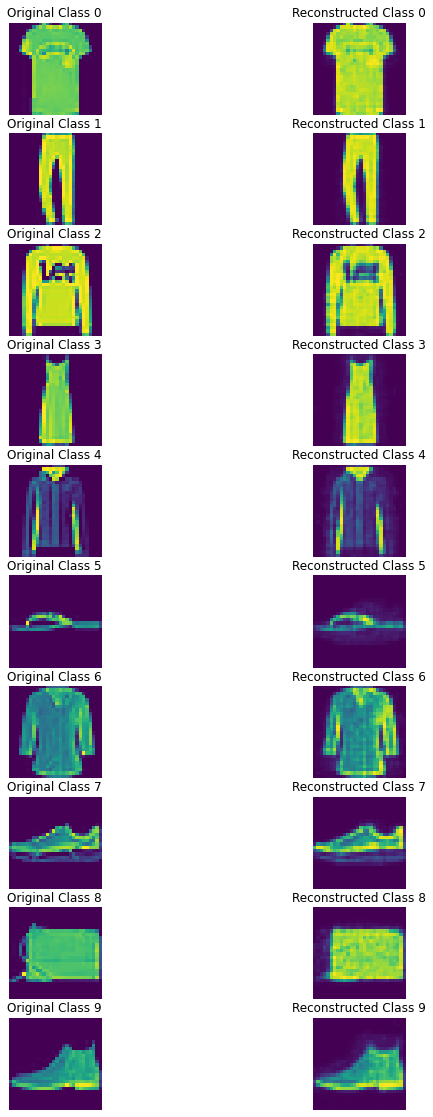

In [5]:
# Show original and reconstructed images
num_classes = 10
class_idx = [[] for _ in range(num_classes)]

for idx, label in enumerate(y_test):
    if all(len(class_idx[i]) >= 1 for i in range(num_classes)):
        break

    if len(class_idx[label]) < 1:
        class_idx[label].append(idx)

fig, axs = plt.subplots(num_classes, 2, figsize=(10, 20))
for i in range(num_classes):
    # Original image
    axs[i, 0].imshow(x_test[class_idx[i][0]].reshape(28, 28), cmap='viridis')
    axs[i, 0].set_title(f"Original Class {i}")
    axs[i, 0].axis('off')

    # Reconstructed image
    axs[i, 1].imshow(x_test_pred[class_idx[i][0]].reshape(28, 28), cmap='viridis')
    axs[i, 1].set_title(f"Reconstructed Class {i}")
    axs[i, 1].axis('off')

plt.show()

## Question 2

In [6]:
import cv2

def blur_images(images, kernel_size=(15, 15)):
    blurred_images = np.empty_like(images)
    
    for i, image in enumerate(images):
        blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
        blurred_images[i] = blurred_image
        
    return blurred_images

In [7]:
# Load the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Create the blurred images
x_train_blurred = blur_images(x_train)
x_test_blurred = blur_images(x_test)

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_blurred = x_train_blurred / 255.0
x_test_blurred = x_test_blurred / 255.0

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_train_blurred = x_train_blurred.reshape((x_train_blurred.shape[0], -1))
x_test_blurred = x_test_blurred.reshape((x_test_blurred.shape[0], -1))

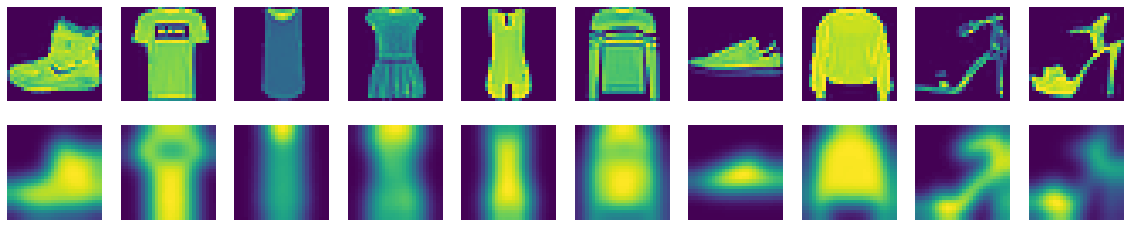

In [8]:
# Display the blurred images

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axs[0, i].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axs[0, i].axis('off')
    axs[1, i].imshow(x_train_blurred[i].reshape(28, 28), cmap='viridis')
    axs[1, i].axis('off')

plt.show()

## Question 3

In [9]:
# Grid search for the optimum number of nodes in the hidden layer
hidden_layer_sizes = [x for x in range(200, 2200, 200)]
mse_evolution = []

for hidden_size in hidden_layer_sizes:
    model = Sequential()
    model.add(Dense(hidden_size, activation='relu', input_shape=(784,)))
    model.add(Dense(784, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    model.fit(x_train_blurred, x_train, batch_size=128, epochs=10, verbose=0)

    x_test_reconstructed = model.predict(x_test_blurred)
    mse = mean_squared_error(x_test, x_test_reconstructed)

    print(f"Hidden Size: {hidden_size}, Test MSE: {mse}")

    mse_evolution.append(mse)

313/313 [==============================] - 0s 1ms/step
Hidden Size: 200, Test MSE: 0.013733953416633558
313/313 [==============================] - 1s 2ms/step
Hidden Size: 400, Test MSE: 0.012152072337744955
313/313 [==============================] - 1s 2ms/step
Hidden Size: 600, Test MSE: 0.011670957542160656
313/313 [==============================] - 1s 2ms/step
Hidden Size: 800, Test MSE: 0.011366556006854826
313/313 [==============================] - 1s 2ms/step
Hidden Size: 1000, Test MSE: 0.011102359463359187
313/313 [==============================] - 1s 1ms/step
Hidden Size: 1200, Test MSE: 0.010934320988847633
313/313 [==============================] - 1s 2ms/step
Hidden Size: 1400, Test MSE: 0.010824906466540019
313/313 [==============================] - 1s 1ms/step
Hidden Size: 1600, Test MSE: 0.010668126801562244
313/313 [==============================] - 1s 2ms/step
Hidden Size: 1800, Test MSE: 0.010740189106219931
313/313 [==============================] - 1s 2ms/step
Hidd

Optimal number of nodes in the hidden layer: 1600



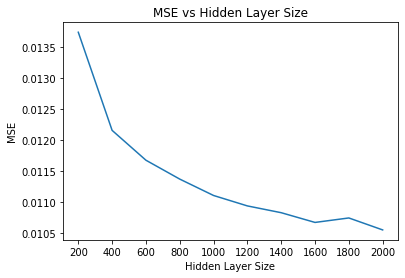

In [16]:
# find optimal : where the MSE is the lowest before any increase

optimal_hidden_size = 0

for i in range(len(mse_evolution)-1):
    if mse_evolution[i] < mse_evolution[i+1]:
        optimal_hidden_size = hidden_layer_sizes[i]
        break

print(f"Optimal number of nodes in the hidden layer: {optimal_hidden_size}\n")

# Display small graph of MSE vs hidden layer size
plt.plot(hidden_layer_sizes, mse_evolution)
plt.xlabel("Hidden Layer Size")
plt.ylabel("MSE")
plt.title("MSE vs Hidden Layer Size")
plt.xticks(hidden_layer_sizes)
plt.show()

We can see the MSE increases for 1800 layers, this means the model is over-fitting and the reconstruction will not be as good. A good number of layers to use is therefore around 1400-1600 layers as we will not over-fit and create the best reconstructions

In [17]:
# Train the model with optimal hidden size
model = Sequential()
model.add(Dense(optimal_hidden_size, activation='relu', input_shape=(784,)))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(x_train_blurred, x_train, batch_size=128, epochs=10, verbose=0)

# Test the model
x_test_reconstructed = model.predict(x_test_blurred)

313/313 [==============================] - 1s 1ms/step


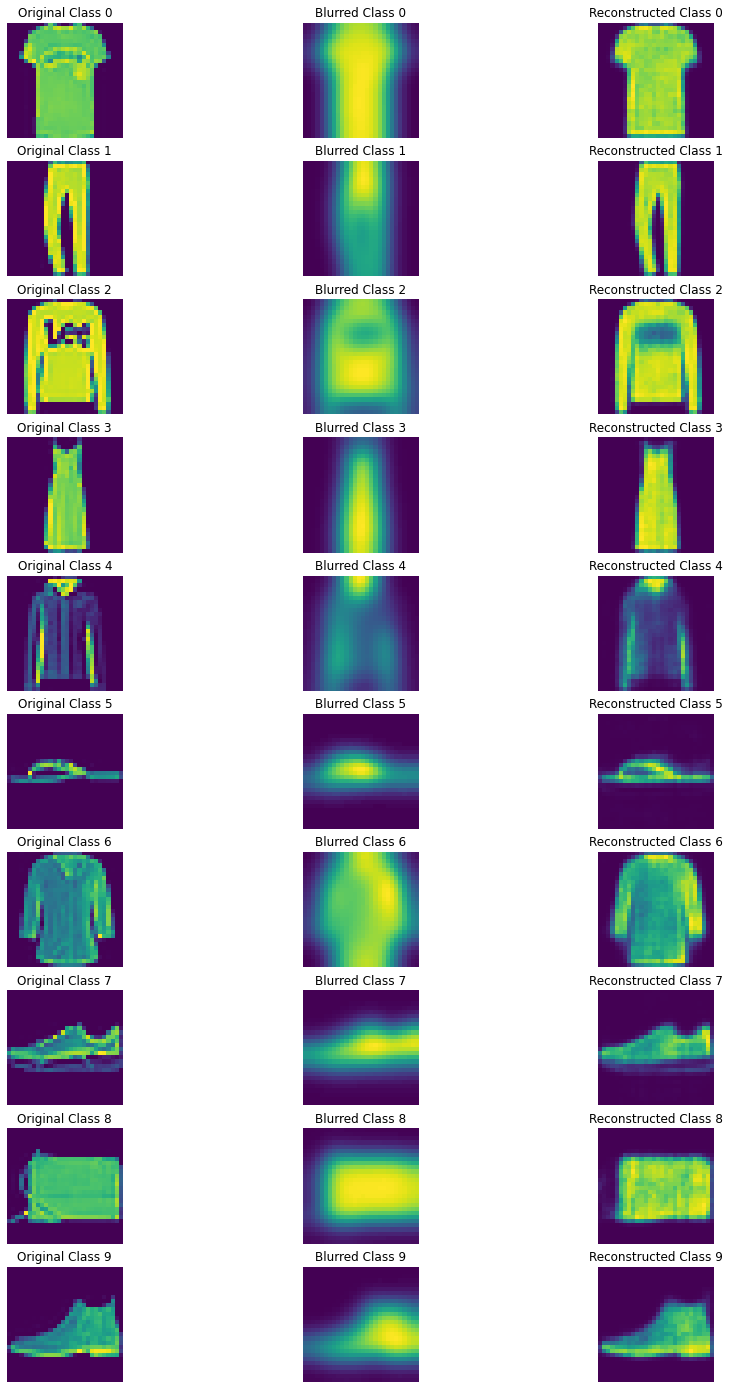

In [18]:
# Plot original, blurred, and reconstructed images for each class
num_classes = 10
fig, axes = plt.subplots(num_classes, 3, figsize=(15, 25))

for i in range(num_classes):
    class_indices = np.where(y_test == i)[0]
    sample_idx = class_indices[0]

    original_image = x_test[sample_idx].reshape(28, 28)
    blurred_image = x_test_blurred[sample_idx].reshape(28, 28)
    reconstructed_image = x_test_reconstructed[sample_idx].reshape(28, 28)

    axes[i, 0].imshow(original_image, cmap='viridis')
    axes[i, 1].imshow(blurred_image, cmap='viridis')
    axes[i, 2].imshow(reconstructed_image, cmap='viridis')

    axes[i, 0].set_title(f"Original Class {i}")
    axes[i, 1].set_title(f"Blurred Class {i}")
    axes[i, 2].set_title(f"Reconstructed Class {i}")

    axes[i, 0].axis('off')
    axes[i, 1].axis('off')
    axes[i, 2].axis('off')

plt.show()